# Data loading

In [1]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jar = pd.read_csv('fuel_swelling_20240109.txt', sep=' ')
columns_drop = ['%eval_id', 'interface', 'FD1', 'FD2', 'FD3', 'fuel_swelling2', 'fuel_swelling3']
jar.drop(columns=columns_drop, inplace=True)

In [3]:
jar

,dGrainHBS,FaceCovMax,SwellLink,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,fuel_swelling1
0,0.000044,0.725,0.02270,1.907000e-18,29010.0,6.315000e-10,5.296000e-31,8.346732
1,0.000048,0.899,0.02587,2.074000e-18,28080.0,6.653000e-10,5.740000e-31,8.321715
2,0.000045,0.835,0.02241,2.134000e-18,35430.0,6.577000e-10,5.252000e-31,8.315956
3,0.000046,0.628,0.02796,1.870000e-18,31140.0,5.596000e-10,5.104000e-31,8.367066
4,0.000042,0.725,0.02707,1.696000e-18,27470.0,6.026000e-10,5.070000e-31,8.382260
...,...,...,...,...,...,...,...,...
3195,0.000038,0.787,0.02303,2.002000e-18,28810.0,5.710000e-10,4.533000e-31,8.298438
3196,0.000039,0.743,0.02428,1.664000e-18,24780.0,6.381000e-10,5.127000e-31,8.374523
3197,0.000038,0.800,0.02456,1.751000e-18,31310.0,5.117000e-10,5.247000e-31,8.412740
3198,0.000046,0.795,0.02365,2.136000e-18,36170.0,5.038000e-10,5.705000e-31,8.368920


<Axes: >

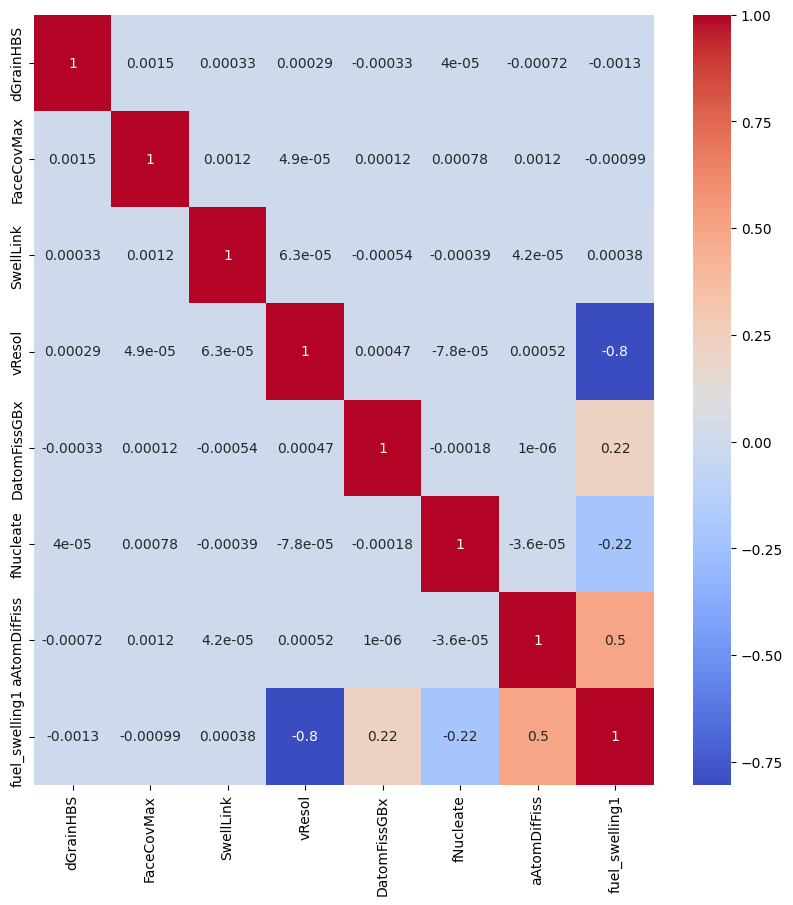

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(jar.corr(), annot=True, cmap='coolwarm')

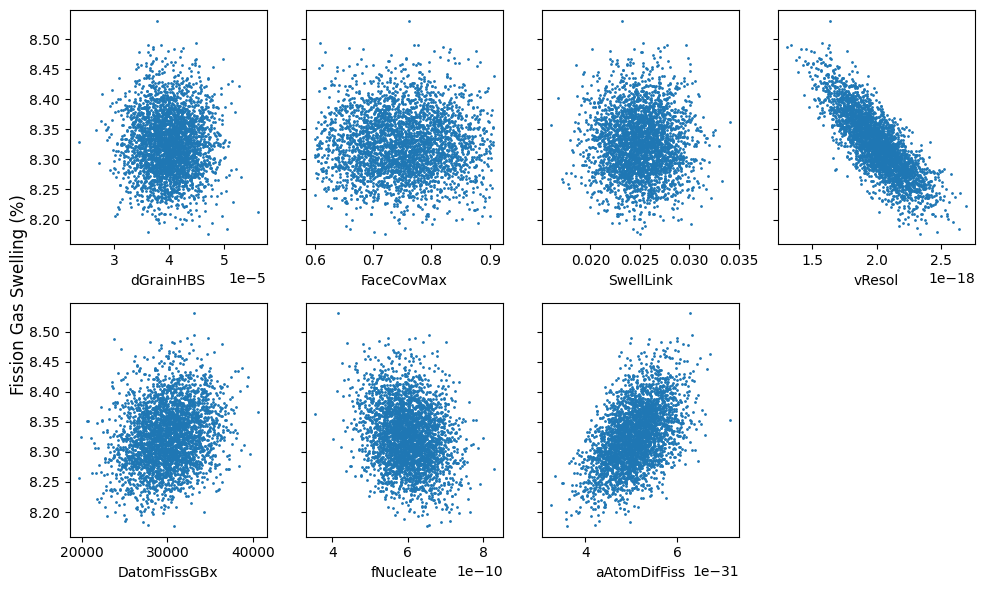

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(jar.iloc[:,i], jar.iloc[:,7], s=1)
    ax.set_xlabel(jar.columns[i])
    #ax.set_ylabel(jar.columns[-1])

fig.delaxes(axes[1,3])
fig.supylabel('Fission Gas Swelling (%)')
plt.tight_layout()
plt.show()

In [26]:
tjar = jar.sample(frac=0.2)

In [27]:
tjar

,dGrainHBS,FaceCovMax,SwellLink,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,fuel_swelling1
2972,0.000037,0.818,0.02196,1.682000e-18,24140.0,6.263000e-10,3.687000e-31,8.284092
1981,0.000038,0.831,0.02215,1.875000e-18,38050.0,6.870000e-10,4.350000e-31,8.323825
607,0.000039,0.771,0.02344,1.967000e-18,28660.0,5.771000e-10,4.665000e-31,8.310662
230,0.000036,0.661,0.02050,1.475000e-18,25330.0,6.304000e-10,4.465000e-31,8.387131
2477,0.000052,0.769,0.02714,2.134000e-18,31840.0,5.647000e-10,4.505000e-31,8.283833
...,...,...,...,...,...,...,...,...
485,0.000036,0.750,0.02488,1.787000e-18,26770.0,5.875000e-10,4.006000e-31,8.300560
1201,0.000038,0.661,0.02714,1.838000e-18,27810.0,6.295000e-10,5.303000e-31,8.357926
2129,0.000039,0.761,0.02405,1.660000e-18,28410.0,6.095000e-10,4.041000e-31,8.332530
2084,0.000045,0.740,0.02757,2.242000e-18,23710.0,5.663000e-10,5.839000e-31,8.292034


In [28]:
tjar.count()

dGrainHBS         640
FaceCovMax        640
SwellLink         640
vResol            640
DatomFissGBx      640
fNucleate         640
aAtomDifFiss      640
fuel_swelling1    640
dtype: int64

<Axes: >

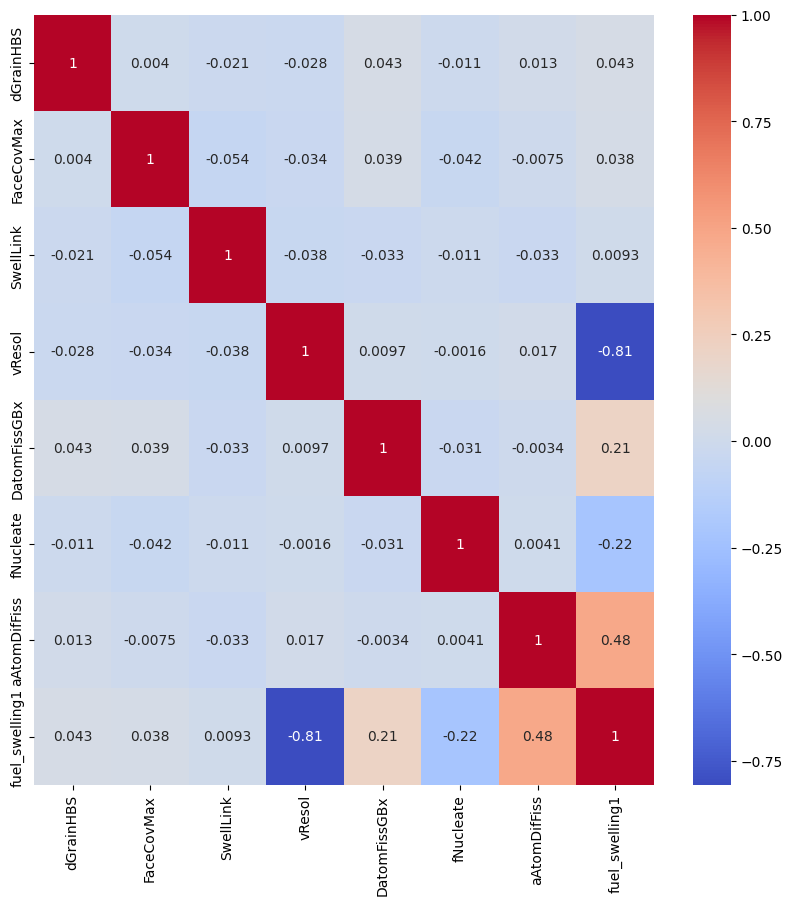

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(tjar.corr(), annot=True, cmap='coolwarm')

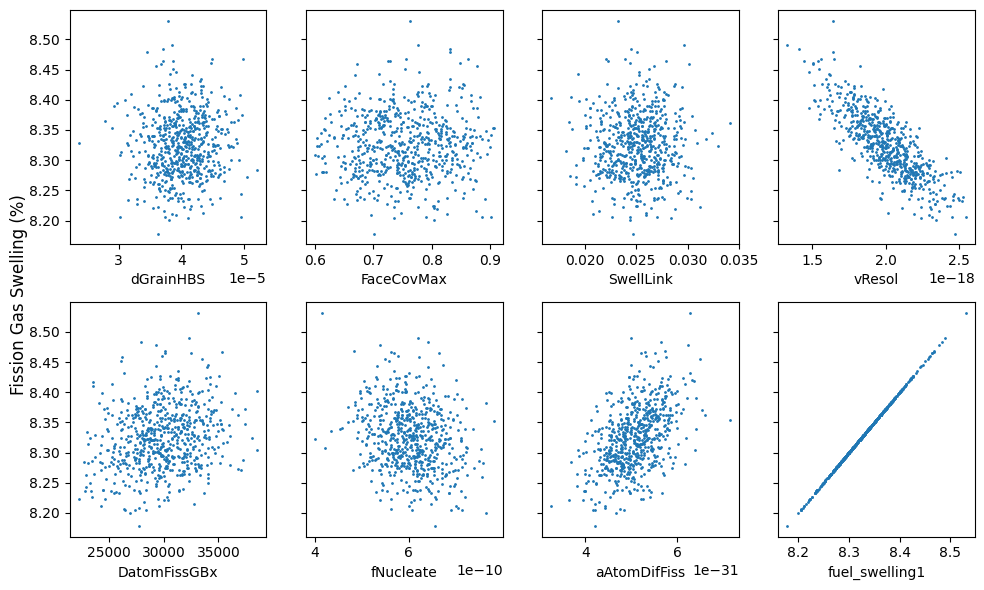

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(tjar.iloc[:,i], tjar.iloc[:,7], s=1)
    ax.set_xlabel(tjar.columns[i])

fig.supylabel('Fission Gas Swelling (%)')
plt.tight_layout()
plt.show()

# GP model

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, WhiteKernel

In [44]:
feat_ind = list(range(7))
features = tjar.iloc[:, feat_ind]
xscaler = StandardScaler()
X = xscaler.fit_transform(features)
y = tjar['fuel_swelling1']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
kernel = DotProduct() + WhiteKernel()
gpreg = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpreg.fit(X_train, y_train)

GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9)

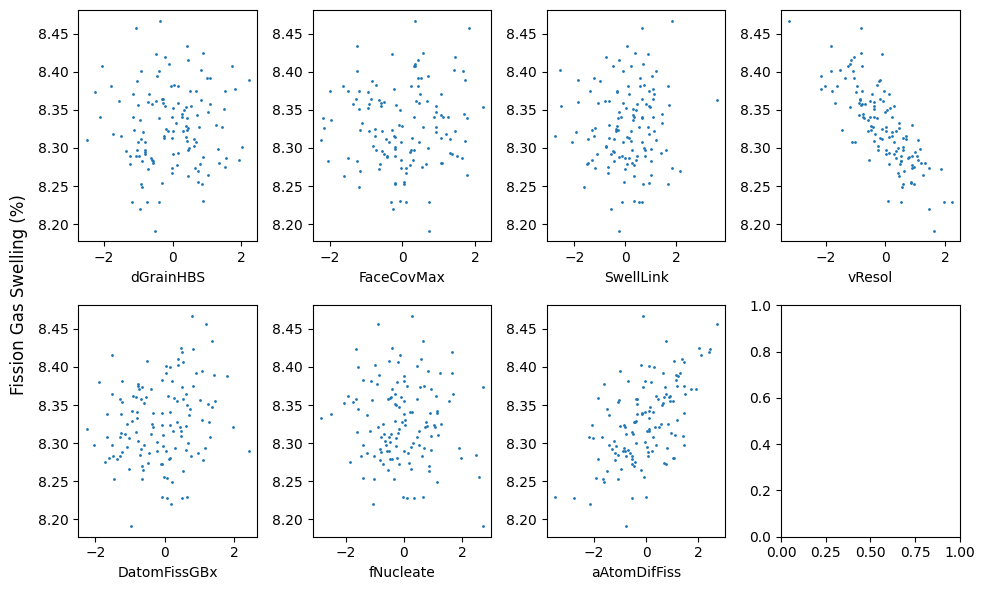

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

y_pred = gpreg.predict(X_test)
for i, ax in enumerate(axes.flatten()[:-1]):
    ax.scatter(X_test[:,i], y_pred, s=1)
    ax.set_xlabel(jar.columns[i])

fig.supylabel('Fission Gas Swelling (%)')
plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9938799015684754

# MCMC

In [112]:
def target_dist(x):
    mu = 8.4
    sig = 0.025
    return np.exp(-0.5 * ((x-mu)/sig)**2)

def candidate_dist(x, sig=0.5):
    return np.random.normal(x, sig)
    
def mod_mcmc_sampler(num_param, num_samples, initial_state, proposal_sigma, model):
    samples = [initial_state]

    for ii in range(num_samples):
        current_state = samples[-1]
        
        for jj in range(num_param):
            current_p = current_state[jj]
            proposed_p = 10
            while (abs(proposed_p) > 5):
                proposed_p = candidate_dist(current_p, proposal_sigma)

            proposed_state = copy.deepcopy(current_state)
            proposed_state[jj] = proposed_p
            theta1 = model.predict([[*current_state]])[0]
            theta2 = model.predict([[*proposed_state]])[0]

            #acceptance_ratio = target_dist(proposed_state) / target_dist(current_state)
            acceptance_ratio = target_dist(theta2) / target_dist(theta1)

            if np.random.rand() < acceptance_ratio:
                current_state = proposed_state

        samples.append(current_state)

    return np.array(samples)

In [113]:
hey = mod_mcmc_sampler(7, 20000, np.zeros(7), 0.3, gpreg)

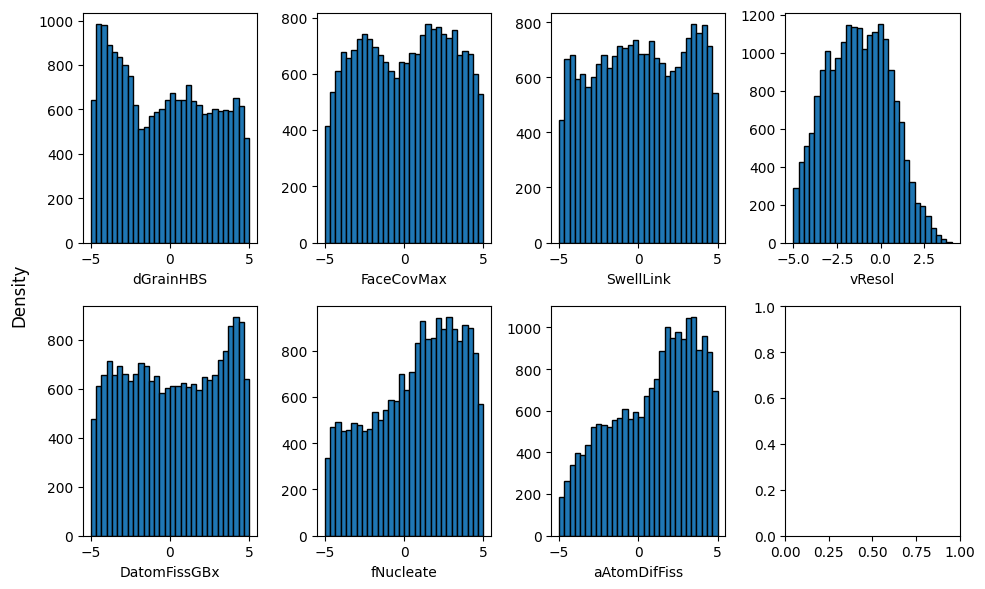

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()[:-1]):
    ax.hist(hey[:,i], bins=30, ec='k')
    ax.set_xlabel(jar.columns[i])
    ax.set_ylabel('')

fig.supylabel('Density')
plt.tight_layout()
plt.show()

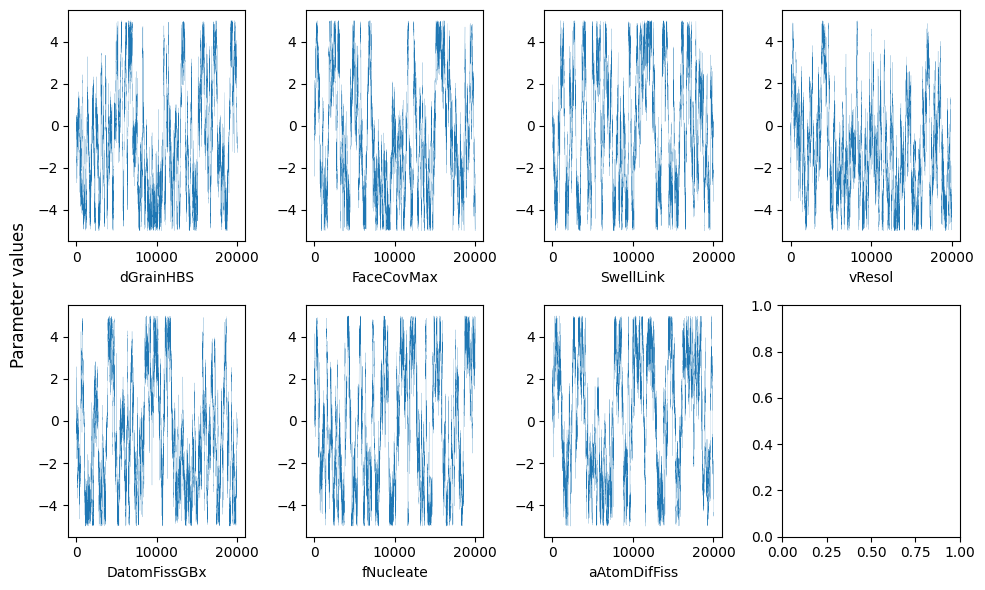

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()[:-1]):
    ax.plot(hey[:,i], lw=0.1)
    ax.set_xlabel(jar.columns[i])

fig.supylabel('Parameter values')
plt.tight_layout()
plt.show()